In [2]:
from sklearn.datasets import load_digits

dataset=load_digits()

data=dataset.data
images=dataset.images
target=dataset.target

print("Data ",data.shape)
print("Images ",images.shape)
print("Target ",target.shape)

print(target)

Data  (1797, 64)
Images  (1797, 8, 8)
Target  (1797,)
[0 1 2 ... 8 9 8]


4


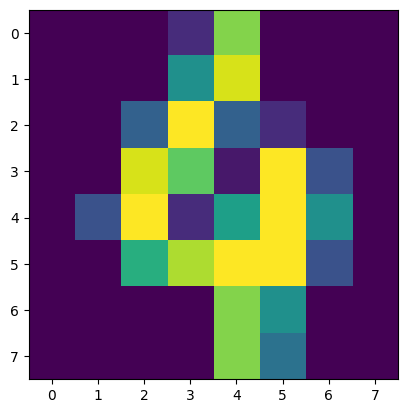

In [3]:
from matplotlib import pyplot as plt

plt.imshow(images[100])
print(target[100])
plt.show()

In [4]:
print(images[100])

[[ 0.  0.  0.  2. 13.  0.  0.  0.]
 [ 0.  0.  0.  8. 15.  0.  0.  0.]
 [ 0.  0.  5. 16.  5.  2.  0.  0.]
 [ 0.  0. 15. 12.  1. 16.  4.  0.]
 [ 0.  4. 16.  2.  9. 16.  8.  0.]
 [ 0.  0. 10. 14. 16. 16.  4.  0.]
 [ 0.  0.  0.  0. 13.  8.  0.  0.]
 [ 0.  0.  0.  0. 13.  6.  0.  0.]]


In [5]:
from keras.utils.np_utils import to_categorical

new_target=to_categorical(target,num_classes=10)
print(new_target[0])
print(target[0])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0


In [6]:
from sklearn.model_selection import train_test_split

trin_data, test_data, train_target, test_target = train_test_split(
    data, new_target, test_size=0.2)

print("Train Data ",trin_data.shape)
print("Test Data ",test_data.shape)
print("Train Target ",train_target.shape)
print("Test Target ",test_target.shape)

Train Data  (1437, 64)
Test Data  (360, 64)
Train Target  (1437, 10)
Test Target  (360, 10)


In [7]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(64,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 19,354
Trainable params: 19,354
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(trin_data,train_target,epochs=500)

Epoch 1/500
45/45 [==============================] - 1s 3ms/step - loss: 1.7651 - accuracy: 0.3939
Epoch 2/500
45/45 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.7919
Epoch 3/500
45/45 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.9422
Epoch 4/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9687
Epoch 5/500
45/45 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.9791
Epoch 6/500
45/45 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9882
Epoch 7/500
45/45 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9882
Epoch 8/500
45/45 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9937
Epoch 9/500
45/45 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9965
Epoch 10/500
45/45 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.9951
Epoch 11/

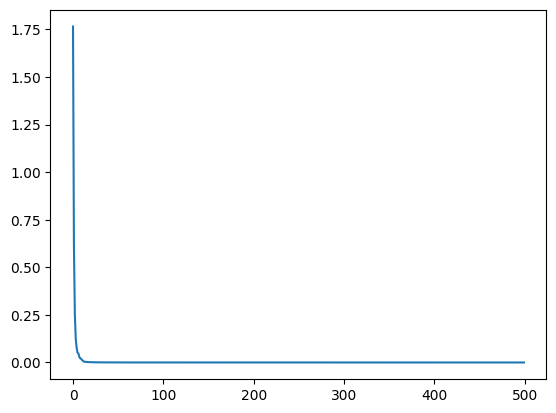

In [9]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.show()

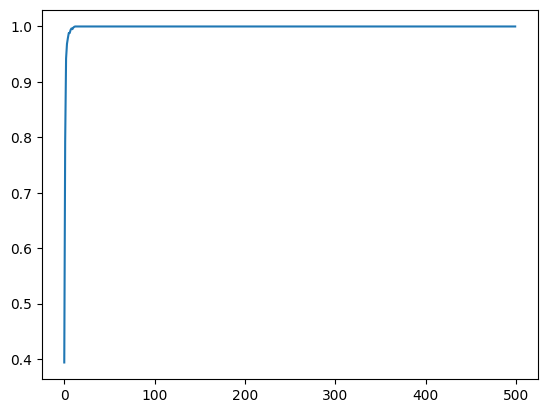

In [10]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.show()

In [11]:
model.evaluate(test_data,test_target)

12/12 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9806


[0.13352814316749573, 0.980555534362793]

In [12]:
predictions=model.predict(test_data)

12/12 [==============================] - 0s 2ms/step


In [13]:
import numpy as np

predicteds=np.argmax(predictions,axis=1)
actuals=np.argmax(test_target,axis=1)

errCount=0

for i in range(len(actuals)):
    if predicteds[i]!=actuals[i]:
        errCount+=1
        print(i,"  ",predicteds[i]," != ",actuals[i])
    else:
        print(predicteds[i],"  ",actuals[i])

print("Err Count : ",errCount,"/",len(actuals))
print("Error : ",errCount/len(actuals)*100,"%")

4    4
5    5
2    2
2    2
0    0
1    1
6    6
6    6
1    1
3    3
0    0
5    5
2    2
13    8  !=  9
3    3
1    1
4    4
6    6
7    7
0    0
7    7
1    1
2    2
3    3
7    7
6    6
7    7
6    6
0    0
29    5  !=  8
5    5
4    4
1    1
0    0
6    6
6    6
9    9
3    3
3    3
2    2
6    6
1    1
9    9
4    4
8    8
8    8
8    8
5    5
5    5
8    8
7    7
6    6
6    6
4    4
3    3
6    6
8    8
9    9
5    5
4    4
9    9
4    4
9    9
1    1
9    9
6    6
2    2
3    3
0    0
8    8
5    5
0    0
1    1
0    0
5    5
9    9
2    2
7    7
6    6
7    7
7    7
0    0
4    4
7    7
4    4
7    7
3    3
7    7
7    7
8    8
9    9
4    4
0    0
1    1
0    0
6    6
5    5
9    9
9    9
6    6
0    0
5    5
7    7
1    1
6    6
4    4
2    2
1    1
6    6
2    2
9    9
1    1
7    7
3    3
6    6
6    6
9    9
3    3
8    8
0    0
3    3
7    7
2    2
2    2
9    9
2    2
3    3
8    8
1    1
3    3
2    2
5    5
1    1
5    5
7    7
1    1
3    3
1    1
138    8  !=  7
5 

In [ ]:
model.save('hwDigits.h5')

: 